In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Primer KPI  Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [55]:
df_concatenado = pd.read_csv('concatenado.csv')


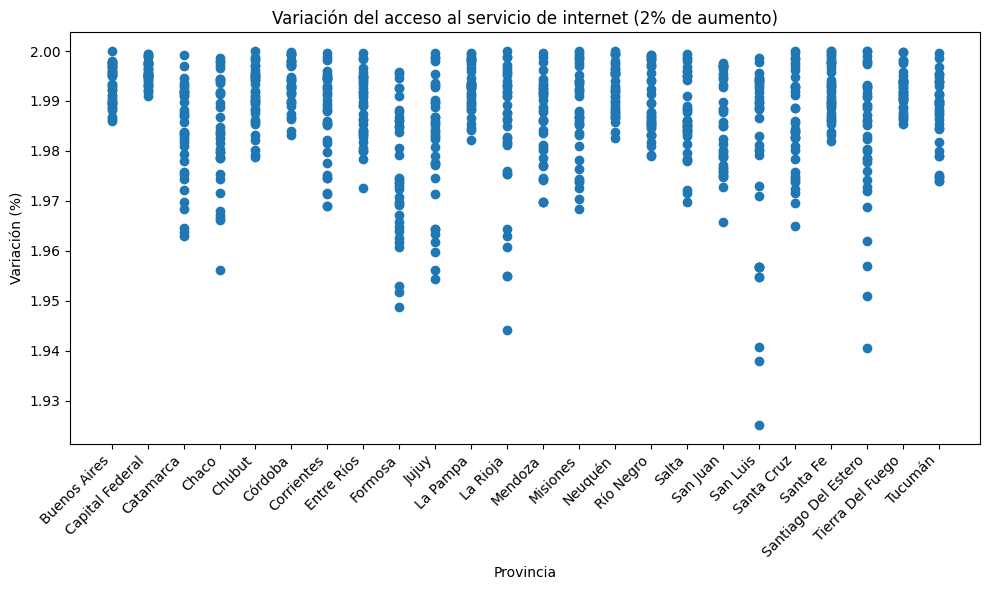

In [56]:
# Calcular el KPI propuesto
# Convertir la columna 'Accesos por cada 100 hogares' a tipo numérico
# Calcular el "Nuevo acceso" para cada provincia
# Graficar el KPI propuesto con un gráfico de puntos

df_concatenado = pd.read_csv('concatenado.csv')

df_concatenado['Accesos por cada 100 hogares'] = df_concatenado['Accesos por cada 100 hogares'].apply(lambda x: float(str(x).replace(',', '.')))

df_concatenado['Nuevo Acceso'] = ((df_concatenado['Accesos por cada 100 hogares'] * 100) * (1 + 0.02)).astype(int)

df_concatenado['KPI Propuesto'] = ((df_concatenado['Nuevo Acceso'] - df_concatenado['Accesos por cada 100 hogares'] * 100) / (df_concatenado['Accesos por cada 100 hogares'] * 100)) * 100

plt.figure(figsize=(10, 6))
plt.scatter(df_concatenado['Provincia'], df_concatenado['KPI Propuesto'])
plt.title('Variación del acceso al servicio de internet (2% de aumento)')
plt.xlabel('Provincia')
plt.ylabel('Variación (%)')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de las provincias para mejor legibilidad
plt.tight_layout()
plt.show()


In [57]:
df_concatenado.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Año.1,Trimestre.1,Banda ancha fija,Dial up,Total,Periodo,Nuevo Acceso,KPI Propuesto
0,2022,4,Buenos Aires,78.94,2022.0,4.0,11.0,12.0,11.0,Oct-Dic 2022,8051,1.988852
1,2022,4,Capital Federal,122.73,2022.0,3.0,11.0,12.0,11.0,Jul-Sept 2022,12518,1.996252
2,2022,4,Catamarca,65.77,2022.0,2.0,11.0,12.0,11.0,Abr-Jun 2022,6708,1.991790
3,2022,4,Chaco,43.62,2022.0,1.0,11.0,13.0,11.0,Ene-Mar 2022,4449,1.994498
4,2022,4,Chubut,85.57,2021.0,4.0,10.0,13.0,10.0,Oct-Dic 2021,8728,1.998364


In [58]:
# Se crea un archivo cvs para el dashboard
df_concatenado.to_csv('Kpiconcatenado.csv', index=False)

## Segundo KPI  aumento de la velocidad en 2% por trimestre

In [59]:
# Cargar el DataFrame desde el archivo CSV
df_velocidad = pd.read_csv('velocidad.csv')




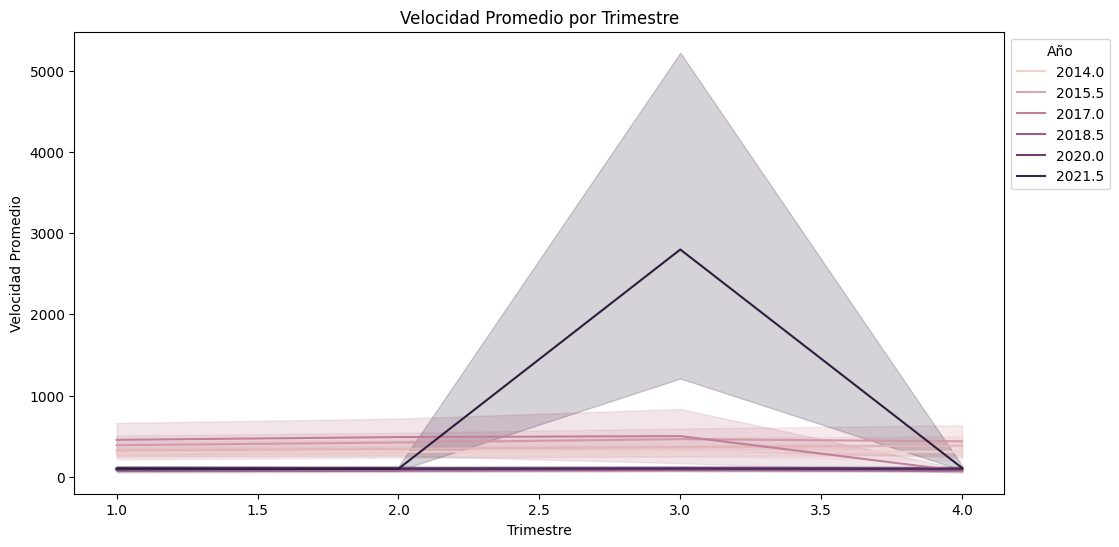

In [60]:
# Convertir las columnas a tipos numéricos
# Calcular la velocidad promedio por trimestre
# Graficar la velocidad promedio por trimestre

df_velocidad.iloc[:, 2:] = df_velocidad.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

df_velocidad['Velocidad Promedio Trimestral'] = df_velocidad.iloc[:, 2:].mean(axis=1)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Trimestre', y='Velocidad Promedio Trimestral', data=df_velocidad, hue='Año')
plt.title('Velocidad Promedio por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Velocidad Promedio')
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [61]:
df_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,...,47 Mbps,52 Mbps,54 Mbps,56 Mbps,63 Mbps,67 Mbps,68 Mbps,71 Mbps,77 Mbps,Velocidad Promedio Trimestral
0,2022.0,4.0,31.981,85.668,NaN,NaN,765.015,335.573,NaN,394.282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.5038
1,2022.0,3.0,33.013,96.727,NaN,NaN,823.505,479.822,NaN,349.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.4204
2,2022.0,2.0,33.667,99.498,NaN,NaN,856.562,485.321,NaN,351.594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.3284
3,2022.0,1.0,34.890,104.840,NaN,NaN,967.508,509.83,NaN,198.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0802
4,2021.0,4.0,41.262,28.521,NaN,NaN,976.539,558.358,NaN,194.251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.7862


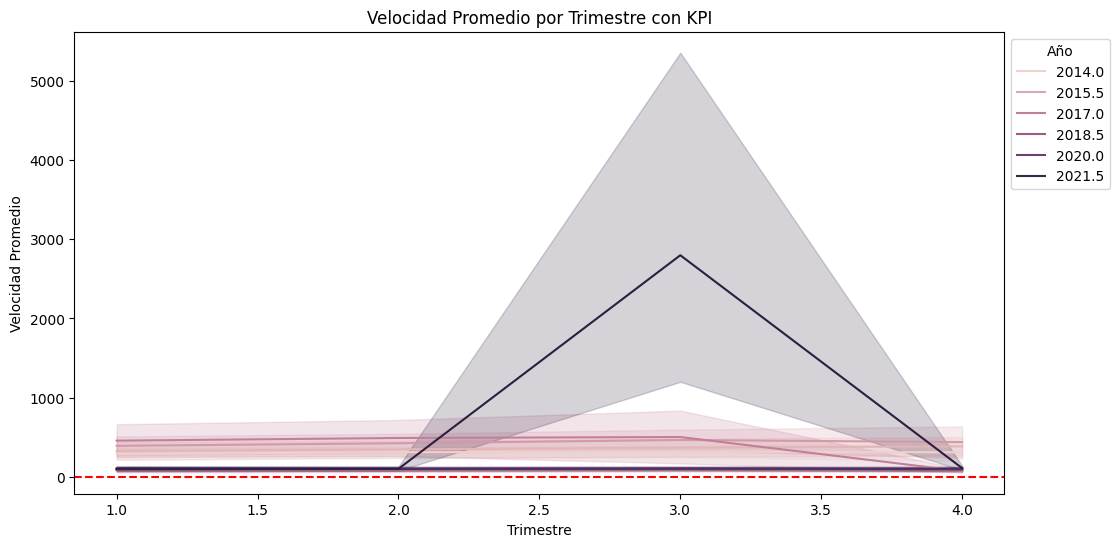

In [62]:
# Calcular el KPI (por ejemplo, un aumento del 2%)
# Calcular la velocidad promedio trimestral
# Graficar la velocidad promedio por trimestre con la línea del KPI
# Agregar la línea del KPI

porcentaje_aumento = 0.02

df_velocidad['Velocidad Promedio Trimestral'] = df_velocidad.iloc[:, 2:].mean(axis=1)

df_velocidad['KPI'] = ((df_velocidad['Velocidad Promedio Trimestral'].shift(-1) - df_velocidad['Velocidad Promedio Trimestral']) / df_velocidad['Velocidad Promedio Trimestral'].replace(0, 1)) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x='Trimestre', y='Velocidad Promedio Trimestral', data=df_velocidad, hue='Año')
plt.title('Velocidad Promedio por Trimestre con KPI')
plt.xlabel('Trimestre')
plt.ylabel('Velocidad Promedio')
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1))

plt.axhline(y=porcentaje_aumento, color='r', linestyle='--', label=f'KPI: +{int(porcentaje_aumento * 100)}%')

plt.show()


In [63]:
df_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,...,52 Mbps,54 Mbps,56 Mbps,63 Mbps,67 Mbps,68 Mbps,71 Mbps,77 Mbps,Velocidad Promedio Trimestral,KPI
0,2022.0,4.0,31.981,85.668,NaN,NaN,765.015,335.573,NaN,394.282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.5038,10.516651
1,2022.0,3.0,33.013,96.727,NaN,NaN,823.505,479.822,NaN,349.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.4204,2.499296
2,2022.0,2.0,33.667,99.498,NaN,NaN,856.562,485.321,NaN,351.594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.3284,-0.615392
3,2022.0,1.0,34.890,104.840,NaN,NaN,967.508,509.83,NaN,198.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0802,-0.907238
4,2021.0,4.0,41.262,28.521,NaN,NaN,976.539,558.358,NaN,194.251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.7862,-17.097098


In [64]:
# Se crea un archivo cvs para el dashboard
df_velocidad.to_csv('Kpivelocidad.csv', index=False)